*This jupyter notebook is part of Arizona State University's course CAS 570 and was written by Bryan Daniels.  It was last updated September 9, 2024.*

## People wandering through a city

Imagine people moving through a city.

To make the point most simply, let's assume we have a bunch of wanderers who don't have a destination in mind.  (We will need more complicated tools when people have more complicated behavior---but the usefulness of the concept of coarse-graining will persist.)

Run the following code to set up the simulation.  (To run a cell in a jupyter notebook, highlight the cell and press shift-enter.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
plt.rcParams.update({'font.size': 14}) # increases font size on plots

def simulate2Ddiffusion(initialState,oneStepFunction,numTimesteps,seed=123):
    """
    Simulates a 2-dimensional diffusion process with particles moving at each timepoint from 
    their current position to a new one according to a given single-step function.
    
    initialState        : an (N x 2) array representing the initial 2D positions of N particles
    oneStepFunction     : a function that acts on an (N x 2) array of positions to perform one simulation step
    numTimesteps        : the number of timesteps to simulate
    
    Returns:
    
    stateHistory        : a (numTimesteps x N x 2) array containing the 2D positions of N particles
                          over time
    """
    np.random.seed(seed)
    stateHistory = []
    currentState = np.copy(initialState)
    for i in range(numTimesteps+1):
        stateHistory.append(currentState)
        currentState = oneStepFunction(currentState)
    return np.array( stateHistory )

def squareStep(state,width=1):
    """
    Takes a step randomly chosen within a square of given width.
    """
    step = width*(np.random.random(size=np.shape(state)) - 0.5)
    return state + step

def manhattanStep(state,stepsize=1):
    """
    Takes a step of given stepsize in a random cardinal direction (north, east, south, or west).
    """
    thetas = np.random.randint(0,4,size=len(state)) * np.pi/2.
    return np.transpose((state[:,0] + stepsize*np.cos(thetas),
                         state[:,1] + stepsize*np.sin(thetas)))

def diskStep(state,diameter=1):
    """
    Takes a step randomly within a disk of given diameter.
    """
    thetas = 2.*np.pi*np.random.random(size=len(state))
    rs = diameter/2. * np.random.random(size=len(state))
    return np.transpose((state[:,0] + rs*np.cos(thetas),
                         state[:,1] + rs*np.sin(thetas)))

def circleStep(state,diameter=1):
    """
    Takes a step of fixed size along a randomly chosen angle.
    """
    thetas = 2.*np.pi*np.random.random(size=len(state))
    rs = np.ones(len(state))
    return np.transpose((state[:,0] + rs*np.cos(thetas),
                         state[:,1] + rs*np.sin(thetas)))

def plotSteps(states,times,colors):
    """
    Given a history of states, plots the locations of particles at given times using given colors.
    """
    for t,color in zip(times,colors):
        plt.scatter(states[t,:,0],states[t,:,1],s=1,color=color)
        plt.axis('equal')
        plt.axis('off')

The simulation starts with a group of people at the same location.  Then each individual takes a step in a random direction.  The direction can be chosen in three ways:
* "Manhattan step": Each person walks one block in a random direction along streets in a square grid.
* "Disk step": Each person chooses a random direction not confined along streets and walks in that direction a random distance up to some maximum.
* "Circle step": Each person chooses a random direction not confined along streets and walks a fixed distance in that direction.

The following code runs the three cases with 2000 individuals taking a single step and plots the resulting positions.

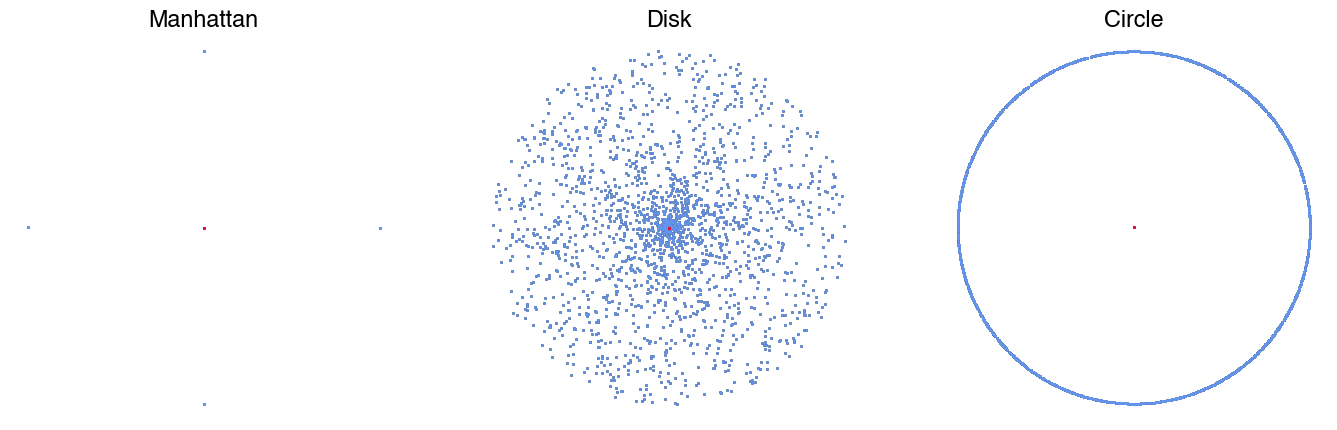

In [2]:
N = 2000 # number of individual people to simulate
numTimesteps = 1 # number of timesteps to simulate

# run the simulation for three types of steps: Manhattan, Disk, and Circle
initialState = np.zeros((N,2))
statesManhattan = simulate2Ddiffusion(initialState,manhattanStep,numTimesteps,seed=123)
statesDisk = simulate2Ddiffusion(initialState,diskStep,numTimesteps,seed=126)
statesCircle = simulate2Ddiffusion(initialState,circleStep,numTimesteps,seed=128)

# plot positions after one step in blue and after numTimesteps steps in black
plt.figure(figsize=(17,5))
for i,states,name in zip(range(3),[statesManhattan,statesDisk,statesCircle],['Manhattan','Disk','Circle']):
    plt.subplot(1,3,i+1)
    plotSteps(states,[numTimesteps,1,0],['black','cornflowerblue','crimson'])
    plt.title(name)

We can show this more precisely by estimating the *probability density*—that is, after they have roamed for some time, how likely are we to find a person on any given patch of land?  

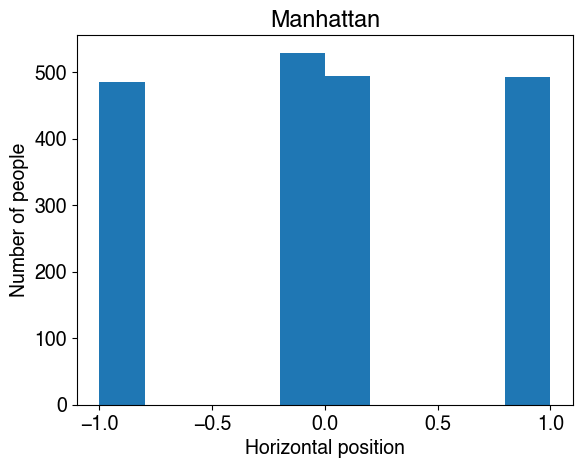

In [3]:
plt.hist(statesManhattan[numTimesteps,:,0])
plt.xlabel('Horizontal position')
plt.ylabel('Number of people')
plt.title('Manhattan');

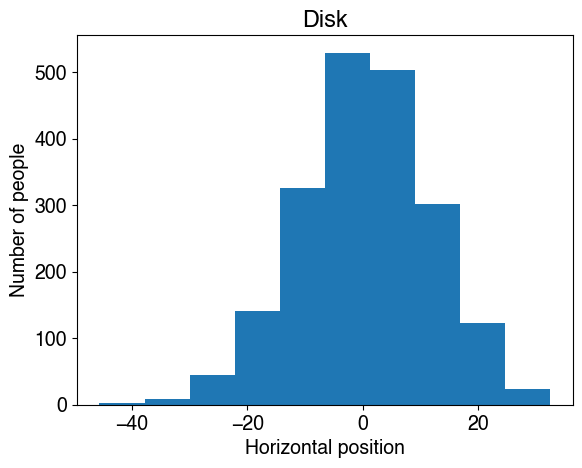

In [7]:
plt.hist(statesDisk[numTimesteps,:,0])
plt.xlabel('Horizontal position')
plt.ylabel('Number of people')
plt.title('Disk');

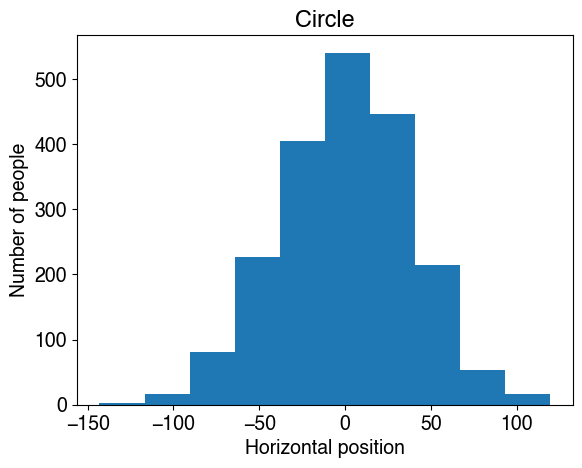

In [8]:
plt.hist(statesCircle[numTimesteps,:,0])
plt.xlabel('Horizontal position')
plt.ylabel('Number of people')
plt.title('Circle');

These three plots look quite similar, though the scale is different: Manhattan walkers end up further from their starting point than Disk walkers.  What if we rescale by this single parameter?  Do we end up converging toward a single emergent distribution shape?

Text(0, 0.5, 'Number of people')

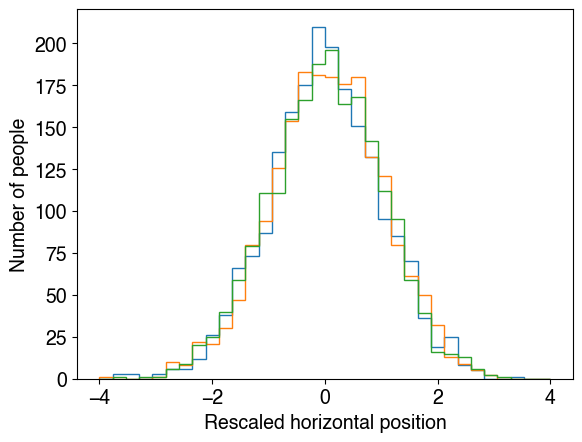

In [9]:
numBins = 35
minx,maxx = -4,4
bins = np.linspace(minx,maxx,numBins)

plt.hist(statesManhattan[numTimesteps,:,0]/np.std(statesManhattan[numTimesteps,:,0]),histtype='step',bins=bins)
plt.hist(statesDisk[numTimesteps,:,0]/np.std(statesDisk[numTimesteps,:,0]),histtype='step',bins=bins)
plt.hist(statesCircle[numTimesteps,:,0]/np.std(statesCircle[numTimesteps,:,0]),histtype='step',bins=bins)
plt.xlabel('Rescaled horizontal position')
plt.ylabel('Number of people')

The statistically inclined among you will recognize this as a normal (Gaussian) distribution.

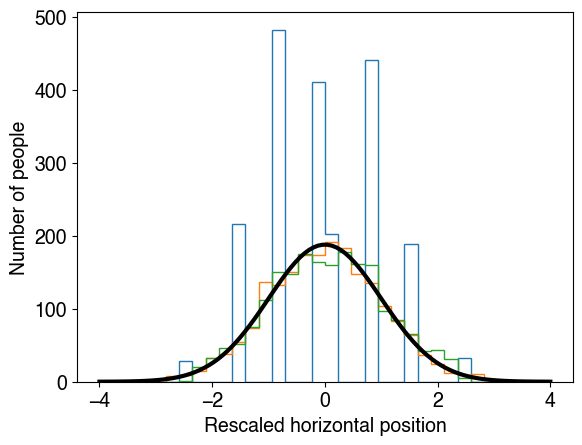

In [19]:
numBins = 35
minx,maxx = -4,4
bins = np.linspace(minx,maxx,numBins)

plt.hist(statesManhattan[numTimesteps,:,0]/np.std(statesManhattan[numTimesteps,:,0]),histtype='step',bins=bins)
plt.hist(statesDisk[numTimesteps,:,0]/np.std(statesDisk[numTimesteps,:,0]),histtype='step',bins=bins)
plt.hist(statesCircle[numTimesteps,:,0]/np.std(statesCircle[numTimesteps,:,0]),histtype='step',bins=bins)
plt.xlabel('Rescaled horizontal position')
plt.ylabel('Number of people')

x = np.linspace(bins[0],bins[-1],100)
binwidth = bins[1]-bins[0]
plt.plot(x,N*binwidth*scipy.stats.norm.pdf(x),'k-',lw=3)

The moral of the story: If we care only about the behavior of walkers over a long time, many details about the small-scale behavior average out and become unimportant.  In this case, the single detail that survives is the average speed of the walker (setting the width of the eventual distribution of possible positions).  

For this reason, even if we know that walkers are, say, confined to streets, we might choose to model their behavior more simply as "Take a bunch of steps in random directions with equal size".  In fact, in this simple case, we can derive the form of the final distribution analytically and do not need to simulate at all!